# WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.
Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

## Your final notebook must:

Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number, city name, and requested URL.
Save both a CSV of all data retrieved and png images for each scatter plot.

### As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.

See Example Solution for a reference on expected format.
Hints and Considerations

You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the geographic coordinate system.

Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.
Though we've never worked with the citipy Python library, push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).
Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

In [163]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import requests as req
import API_Keys
import json
from citipy import citipy

In [164]:
mykey = API_Keys.OWM_Key

In [165]:
url = 'http://api.openweathermap.org/data/2.5/weather'


In [166]:
city_df = pd.DataFrame()

In [167]:
lat,lng = ["Latitude","Longitude"]

In [168]:
for x in range(650):
    randlat = np.random.uniform(low=-90.000,high=90.000,size=1)
    randlon = np.random.uniform(low=-180.000,high=180.000,size=1)
    randomcity = pd.DataFrame([[randlat,randlon]],columns=[lat,lng]).astype(float)
    city_df = city_df.append(randomcity)
new_city_df = city_df.reset_index()


In [169]:
city_df.head()


,Latitude,Longitude
0,-78.533106,156.531638
0,-32.149709,63.027527
0,22.590865,60.044884
0,-87.166298,134.993826
0,3.799089,-172.185280


In [170]:
mycities = []
counter = 0

while counter < 650:
    lat = new_city_df["Latitude"][counter]
    lng = new_city_df["Longitude"][counter]
    city = citipy.nearest_city(lat,lng)
    cityname = city.city_name
    country_code = city.country_code

    if cityname not in mycities:
        mycities.append([cityname,country_code,lat,lng])
    counter +=1
    
number_of_cities = len(mycities)
print(number_of_cities)

650


In [171]:
mycities = pd.DataFrame(mycities,columns=['City','Country','Latitude','Longitude'])
mycities

,City,Country,Latitude,Longitude
0,bluff,nz,-78.533106,156.531638
1,souillac,mu,-32.149709,63.027527
2,sur,om,22.590865,60.044884
3,hobart,au,-87.166298,134.993826
4,saleaula,ws,3.799089,-172.185280
5,puerto princesa,ph,9.173430,119.522781
6,bluff,nz,-65.228542,157.003954
7,nadym,ru,64.754344,72.614999
8,vaini,to,-65.135506,-170.799764
9,rikitea,pf,-50.346107,-126.241625


In [172]:
weather= []

In [173]:
params = {'appid': mykey,
          'q': '',
          'units': 'imperial'}


for index, row in mycities.iterrows():
    params['q'] = row.City + ',' + row.Country
    print("Processing record " + str(index + 1) + " of " + str(number_of_cities) + " | " + row.City)
    print(url + "?units=" + params['units'] + "&APPID=" + params['appid'] + "&q=" + row.City.replace(" ", "%20") + ',' + row.Country)
    response = req.get(url, params=params).json()
    weather.append(response)

Processing record 1 of 650 | bluff
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=bluff,nz
Processing record 2 of 650 | souillac
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=souillac,mu
Processing record 3 of 650 | sur
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=sur,om
Processing record 4 of 650 | hobart
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=hobart,au
Processing record 5 of 650 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=saleaula,ws
Processing record 6 of 650 | puerto princesa
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=puerto%20princesa,ph
Processing record 7 of 650 | bluff
http://api.openweathermap.org/data/2.5/weather?unit

Processing record 54 of 650 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=tiksi,ru
Processing record 55 of 650 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=taolanaro,mg
Processing record 56 of 650 | mecca
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=mecca,sa
Processing record 57 of 650 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=punta%20arenas,cl
Processing record 58 of 650 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=puerto%20ayora,ec
Processing record 59 of 650 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=rikitea,pf
Processing record 60 of 650 | revelstoke
http://api.openweathermap.o

Processing record 107 of 650 | atuona
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=atuona,pf
Processing record 108 of 650 | piacabucu
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=piacabucu,br
Processing record 109 of 650 | ust-barguzin
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=ust-barguzin,ru
Processing record 110 of 650 | tarazona
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=tarazona,es
Processing record 111 of 650 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=tuktoyaktuk,ca
Processing record 112 of 650 | bilma
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=bilma,ne
Processing record 113 of 650 | palmares do sul
http://api.openwe

Processing record 160 of 650 | barrow
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=barrow,us
Processing record 161 of 650 | bluff
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=bluff,nz
Processing record 162 of 650 | sakakah
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=sakakah,sa
Processing record 163 of 650 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=kodiak,us
Processing record 164 of 650 | kilindoni
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=kilindoni,tz
Processing record 165 of 650 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=yellowknife,ca
Processing record 166 of 650 | new norfolk
http://api.openweathermap.org/data/

Processing record 213 of 650 | borgarnes
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=borgarnes,is
Processing record 214 of 650 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=punta%20arenas,cl
Processing record 215 of 650 | albany
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=albany,au
Processing record 216 of 650 | husavik
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=husavik,is
Processing record 217 of 650 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=tuktoyaktuk,ca
Processing record 218 of 650 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=punta%20arenas,cl
Processing record 219 of 650 | albany
http://api

Processing record 266 of 650 | khash
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=khash,ir
Processing record 267 of 650 | grootfontein
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=grootfontein,na
Processing record 268 of 650 | atuona
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=atuona,pf
Processing record 269 of 650 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=puerto%20ayora,ec
Processing record 270 of 650 | miranda
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=miranda,br
Processing record 271 of 650 | mataura
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=mataura,pf
Processing record 272 of 650 | jardim
http://api.openweathermap.or

Processing record 319 of 650 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=hithadhoo,mv
Processing record 320 of 650 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=rikitea,pf
Processing record 321 of 650 | mataura
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=mataura,pf
Processing record 322 of 650 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=belushya%20guba,ru
Processing record 323 of 650 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=ushuaia,ar
Processing record 324 of 650 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=yellowknife,ca
Processing record 325 of 650 | port hawkesbury
http://ap

Processing record 372 of 650 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=hithadhoo,mv
Processing record 373 of 650 | fevralsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=fevralsk,ru
Processing record 374 of 650 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=ilulissat,gl
Processing record 375 of 650 | acapulco
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=acapulco,mx
Processing record 376 of 650 | saint george
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=saint%20george,bm
Processing record 377 of 650 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=hermanus,za
Processing record 378 of 650 | bayji
http://api.openweat

Processing record 424 of 650 | atuona
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=atuona,pf
Processing record 425 of 650 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=ushuaia,ar
Processing record 426 of 650 | salym
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=salym,ru
Processing record 427 of 650 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=san%20patricio,mx
Processing record 428 of 650 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=carnarvon,au
Processing record 429 of 650 | romitan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=romitan,uz
Processing record 430 of 650 | tura
http://api.openweathermap.org/data/2

Processing record 477 of 650 | great falls
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=great%20falls,us
Processing record 478 of 650 | macamic
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=macamic,ca
Processing record 479 of 650 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=hasaki,jp
Processing record 480 of 650 | mrirt
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=mrirt,ma
Processing record 481 of 650 | nizhniy kuranakh
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=nizhniy%20kuranakh,ru
Processing record 482 of 650 | buala
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=buala,sb
Processing record 483 of 650 | saint-francois
http://api.openw

Processing record 530 of 650 | paradwip
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=paradwip,in
Processing record 531 of 650 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=port%20alfred,za
Processing record 532 of 650 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=rikitea,pf
Processing record 533 of 650 | mataura
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=mataura,pf
Processing record 534 of 650 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=provideniya,ru
Processing record 535 of 650 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=saskylakh,ru
Processing record 536 of 650 | vaini
http://api.openweathe

Processing record 583 of 650 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=nizhneyansk,ru
Processing record 584 of 650 | vicente guerrero
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=vicente%20guerrero,mx
Processing record 585 of 650 | zhezkazgan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=zhezkazgan,kz
Processing record 586 of 650 | mount pleasant
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=mount%20pleasant,us
Processing record 587 of 650 | porterville
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=porterville,us
Processing record 588 of 650 | muros
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=muros,es
Processing record 589 of 650

Processing record 636 of 650 | port-cartier
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=port-cartier,ca
Processing record 637 of 650 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=ribeira%20grande,pt
Processing record 638 of 650 | gzhatsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=gzhatsk,ru
Processing record 639 of 650 | beloha
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=beloha,mg
Processing record 640 of 650 | san angelo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=san%20angelo,us
Processing record 641 of 650 | belmonte
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ab5d135be77e22bb52e5cdd1e43a09e2&q=belmonte,br
Processing record 642 of 650 | arraial do cabo
h

In [174]:
# Create new df empty column names for the weather
mycities["Temperature"]= ""
mycities["Humidity"]=""
mycities["Cloudliness"]= ""
mycities["Wind_Speed"]=""

count_rows= 0

In [175]:
params = {"q":mycities['City']+","+mycities['Country'],"units":"IMPERIAL","mode":"json","appid":mykey}

In [177]:
for index, row in mycities.iterrows():
    
    params2 = {"q":mycities.loc[index]['City']+","+mycities.loc[index]['Country'],"units":"IMPERIAL","mode":"json","appid":mykey}
    
    print("Processing record "+ (mycities.loc[index]['City'])+" "+"City "+str(index+1)+" of "+str(len(mycities)))
    count_rows +=1
    print(url)
    

    testcity = req.get(url,params=params2).json()
    try:
        city_temp= testcity["main"]["temp"]
        city_humidity = testcity["main"]["humidity"]
        city_cloudliness = testcity["clouds"]["all"]
        city_windspeed = testcity["wind"]["speed"]
    
        mycities.set_value(index,"Temperature",city_temp)
        mycities.set_value(index,"Humidity",city_humidity)
        mycities.set_value(index,"Cloudliness", city_cloudliness)
        mycities.set_value(index,"Wind_Speed",city_windspeed)
    except:
        print("Not found in city data, Skipping this City")
        continue
    
print([city_temp,city_humidity,city_cloudliness,city_windspeed])
mycities

Processing record bluff City 1 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record souillac City 2 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record sur City 3 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record hobart City 4 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record saleaula City 5 of 650
http://api.openweathermap.org/data/2.5/weather
Not found in city data, Skipping this City
Processing record puerto princesa City 6 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record bluff City 7 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record nadym City 8 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record vaini City 9 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record rikitea City 10 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record constitucion City 11 of 650
http://api.openweathermap.org/data/2.5/weat

Processing record atuona City 90 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record taoudenni City 91 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record umzimvubu City 92 of 650
http://api.openweathermap.org/data/2.5/weather
Not found in city data, Skipping this City
Processing record vaitupu City 93 of 650
http://api.openweathermap.org/data/2.5/weather
Not found in city data, Skipping this City
Processing record tessalit City 94 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record bryan City 95 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record rikitea City 96 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record saleaula City 97 of 650
http://api.openweathermap.org/data/2.5/weather
Not found in city data, Skipping this City
Processing record chokurdakh City 98 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record krasnyy yar City 99 of 650
http://api.openweathermap.or

Processing record lewistown City 175 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record mataura City 176 of 650
http://api.openweathermap.org/data/2.5/weather
Not found in city data, Skipping this City
Processing record hambantota City 177 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record rikitea City 178 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record taolanaro City 179 of 650
http://api.openweathermap.org/data/2.5/weather
Not found in city data, Skipping this City
Processing record alappuzha City 180 of 650
http://api.openweathermap.org/data/2.5/weather
Not found in city data, Skipping this City
Processing record nikolskoye City 181 of 650
http://api.openweathermap.org/data/2.5/weather
Not found in city data, Skipping this City
Processing record illoqqortoormiut City 182 of 650
http://api.openweathermap.org/data/2.5/weather
Not found in city data, Skipping this City
Processing record okhotsk City 183 of 650
http://api

Processing record riberalta City 259 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record narsaq City 260 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record never City 261 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record sur City 262 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record ekhabi City 263 of 650
http://api.openweathermap.org/data/2.5/weather
Not found in city data, Skipping this City
Processing record coquimbo City 264 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record vaini City 265 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record khash City 266 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record grootfontein City 267 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record atuona City 268 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record puerto ayora City 269 of 650
http://api.openweathermap

Not found in city data, Skipping this City
Processing record arequipa City 343 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record omboue City 344 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record bambous virieux City 345 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record mar del plata City 346 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record east london City 347 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record mataura City 348 of 650
http://api.openweathermap.org/data/2.5/weather
Not found in city data, Skipping this City
Processing record hermanus City 349 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record novokayakent City 350 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record kapaa City 351 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record avarua City 352 of 650
http://api.openweathermap.org/data/2.5/weather
Pro

Processing record salym City 426 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record san patricio City 427 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record carnarvon City 428 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record romitan City 429 of 650
http://api.openweathermap.org/data/2.5/weather
Not found in city data, Skipping this City
Processing record tura City 430 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record arraial do cabo City 431 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record hilo City 432 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record cape town City 433 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record mantua City 434 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record hobart City 435 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record ostrovnoy City 436 of 650
http://api.openw

Processing record sadiqabad City 512 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record carnarvon City 513 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record atuona City 514 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record haian City 515 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record komsomolskiy City 516 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record hilo City 517 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record butaritari City 518 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record dauphin City 519 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record vaini City 520 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record methoni City 521 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record rikitea City 522 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record

Processing record tsihombe City 595 of 650
http://api.openweathermap.org/data/2.5/weather
Not found in city data, Skipping this City
Processing record tiksi City 596 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record albany City 597 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record taksimo City 598 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record saint-philippe City 599 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record avarua City 600 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record qaanaaq City 601 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record ballina City 602 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record kapaa City 603 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record jamestown City 604 of 650
http://api.openweathermap.org/data/2.5/weather
Processing record lebu City 605 of 650
http://api.openweatherma

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudliness,Wind_Speed
0,bluff,nz,-78.533106,156.531638,67.54,79,48,12.77
1,souillac,mu,-32.149709,63.027527,75.64,83,48,11.21
2,sur,om,22.590865,60.044884,72.94,100,20,15.79
3,hobart,au,-87.166298,134.993826,59,47,75,18.34
4,saleaula,ws,3.799089,-172.185280,,,,
5,puerto princesa,ph,9.173430,119.522781,80.6,83,75,4.7
6,bluff,nz,-65.228542,157.003954,67.54,79,48,12.77
7,nadym,ru,64.754344,72.614999,23.85,90,44,14.34
8,vaini,to,-65.135506,-170.799764,84.2,79,75,17.22
9,rikitea,pf,-50.346107,-126.241625,76.86,100,92,16.35


In [178]:
# save the Series as a csv file
mycities.to_csv("mycities_weather.csv",encoding="utf-8",index=False)

In [179]:
weather_df = pd.read_csv("mycities_weather.csv")

In [180]:
weather_df.dtypes

City            object
Country         object
Latitude       float64
Longitude      float64
Temperature    float64
Humidity       float64
Cloudliness    float64
Wind_Speed     float64
dtype: object

In [181]:
#convert to DataFrame and drop the cities that were skipped due to no data
cities_remove = weather_df.dropna(how='any')
cities_remove.count()
cities_remove

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudliness,Wind_Speed
0,bluff,nz,-78.533106,156.531638,67.54,79.0,48.0,12.77
1,souillac,mu,-32.149709,63.027527,75.64,83.0,48.0,11.21
2,sur,om,22.590865,60.044884,72.94,100.0,20.0,15.79
3,hobart,au,-87.166298,134.993826,59.00,47.0,75.0,18.34
5,puerto princesa,ph,9.173430,119.522781,80.60,83.0,75.0,4.70
6,bluff,nz,-65.228542,157.003954,67.54,79.0,48.0,12.77
7,nadym,ru,64.754344,72.614999,23.85,90.0,44.0,14.34
8,vaini,to,-65.135506,-170.799764,84.20,79.0,75.0,17.22
9,rikitea,pf,-50.346107,-126.241625,76.86,100.0,92.0,16.35
11,faanui,pf,-3.358808,-153.400505,82.71,98.0,0.0,12.44


## Temperature (F) vs. Latitude Plot dated 12/03/2017

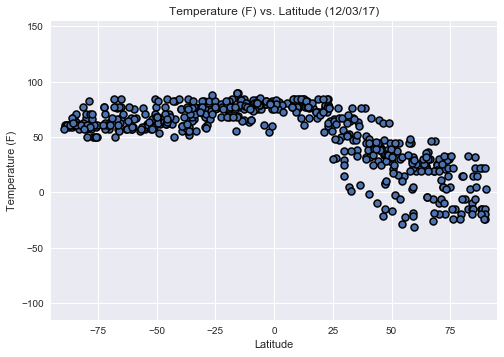

In [193]:
#Temperature Plot
plt.scatter(cities_remove["Latitude"],cities_remove["Temperature"],edgecolors="black",linewidths=1.5,marker="o")

#Plot labels

plt.title("Temperature (F) vs. Latitude (12/03/17)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid=True
plt.xlim([-95,95])
plt.ylim([-115,155])

#Save Plot
plt.savefig("Temperature (F) vs. Latitude.png")

plt.show()

## Humidity (%) vs. Latitude Plot dated 12/03/2017

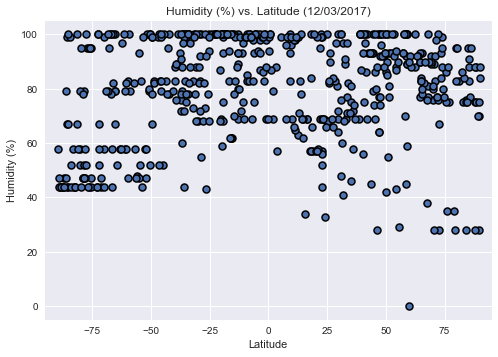

In [194]:
#Humidity Plot
plt.scatter(cities_remove["Latitude"],cities_remove["Humidity"],edgecolors="black",linewidths=1.5,marker="o")

#Plot labels

plt.title("Humidity (%) vs. Latitude (12/03/2017)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid=True
plt.xlim([-95,95])
plt.ylim([-5,105])

#Save Plot
plt.savefig("Humidity (%) vs. Latitude.png")

plt.show()

## Cloudliness (%) vs. Latitude Plot dated (12/03/2017)

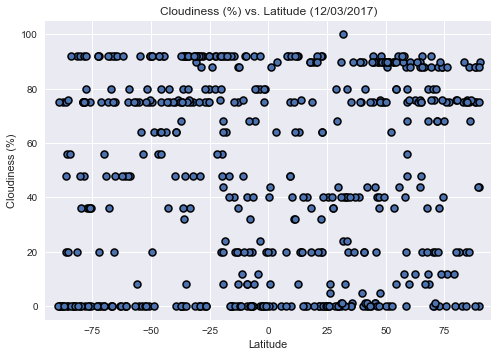

In [195]:
#Cloudiness Plot
plt.scatter(cities_remove["Latitude"],cities_remove["Cloudliness"],edgecolors="black",linewidths=1.5,marker="o")

#Plot labels

plt.title("Cloudiness (%) vs. Latitude (12/03/2017)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid=True
plt.xlim([-95,95])
plt.ylim([-5,105])

#Save Plot
plt.savefig("Cloudiness (%) vs. Latitude.png")

plt.show()

## Wind Speed (mph) vs. Latitude Plot dated 12/03/2017

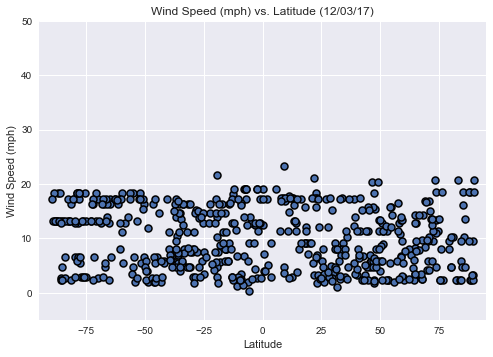

In [196]:
#Wind Speed Plot
plt.scatter(cities_remove["Latitude"],cities_remove["Wind_Speed"],edgecolors="black",linewidths=1.5,marker="o")

#Plot labels

plt.title("Wind Speed (mph) vs. Latitude (12/03/17)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid=True
plt.xlim([-95,95])
plt.ylim([-5,50])

#Save Plot
plt.savefig("Wind Speed (mph) vs. Latitude.png")

plt.show()

### Findings

* Latitude seems to have the most impact on Temperature
* Latitude seems to have little impact on Cloudliness and Wind Speed
* Latitude seems to have a minor effect on Humidity